# feature set 2 chromosomes 2, 3, 4 

## In this notebook:

* single input dataframe 
* using feature set 2
* model: SVM
* only training/test split, no epochs 
* aucuracy assessement of SVM:  0.74 (rbf)

In [21]:
#!pip install torch
#!pip install pandas
#!pip install numpy
#!pip install sklearn
#!pip install matplotlib

In [22]:
import torch
import pandas as pd
import numpy as np

# using sklearn goodies
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


## pull in pickled dataframe:
df = pd.read_pickle("./pickled/chr2-4_featureset2.pkl")
df.shape


(13734, 12)

In [23]:
## Split into train/test
data_copy = df.copy()
df_train = data_copy.sample(frac=0.75, random_state=1)
df_test = data_copy.drop(df_train.index)

print ('Training data subset\n')
print (df_train.head(3))  # head default n=5, first 3 is enough
print ('\nTest data subset\n')
print (df_test.head(3))


## Get label:
train_labels = df_train.pop('Problematic')  # replace with clinvar when column is available
test_labels = df_test.pop('Problematic')

Training data subset

                       aapos  APPRIS TSL codonpos  Ancestral_allele  \
chr pos       ref alt                                                 
4   169424635 G   A      950      -2   1        2                 2   
3   49417816  A   G       -1       0   5        0                 1   
2   165992011 T   C     1744      -1   5        2                 2   

                      HUVEC_fitCons_score      ExAC_cnv.score         GDI  \
chr pos       ref alt                                                       
4   169424635 G   A              0.655142   -0.77426984526488  1485.56231   
3   49417816  A   G              0.089868   0.570050622052176   117.95799   
2   165992011 T   C              0.564101  -0.670522875676554   148.17021   

                      LoFtool_score  SORVA_LOF_MAF0.005_HetOrHom  \
chr pos       ref alt                                              
4   169424635 G   A        9.68E-01                     0.001198   
3   49417816  A   G        9.87E

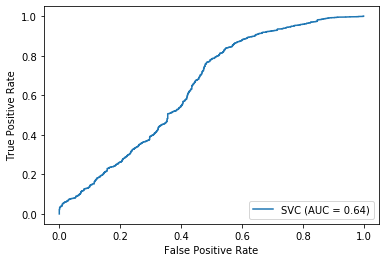

y true [0 0 0 ... 1 1 1]
y predicted [1 1 1 ... 1 1 1]
Confusion matrix: 
 [[ 170  790]
 [  80 2350]]
Accuracy: 0.7433628318584071
Recall TP/(TP+FN): [0.17708333 0.96707819]
Precision TP/(TP+FP): [0.68       0.74840764]
F1: [0.28099174 0.8438061 ]


In [24]:
## Try a binary support vector machine:

classifier1 = SVC(kernel='rbf', gamma='scale',random_state=42) # default for kernel and gamma. AUC = 0.94
#classifier2 = SVC(kernel='linear', gamma=10 ,random_state=42) # 0.94
#classifier3 = SVC(kernel='sigmoid', gamma=10 ,random_state=42) # 0.82

classifier1.fit(df_train, train_labels)
svc_disp = plot_roc_curve(classifier1, df_test, test_labels)
plt.show()


### Run some stats to see if the model is doing well. 
### Note: for chr20, there are 696 exampels that pass, meaning 25% used for testing gives low numbers, see cm
y_true = test_labels.to_numpy()
y_pred = classifier1.predict(df_test)


print("y true", y_true) ## These are both numpy arrays now, why are the metrics returning arrays rather than single f
print("y predicted", y_pred)

## see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall_score

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n", confusion_matrix(y_true, y_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_true, y_pred))

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)
print("Recall TP/(TP+FN):", recall)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)
print("Precision TP/(TP+FP):",precision)
#recall: 195 / 195+552 = 195/747 = 0.261
#precision: 195 / 195+132 = 195/327 =0.596

# F1 score
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:", F1)